<a href="https://www.kaggle.com/code/averma111/simple-linear-regression?scriptVersionId=124369460" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!wget http://bit.ly/3ZLyF82 -O CSS.css -q
    
from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [4]:
train_df= pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')
train_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


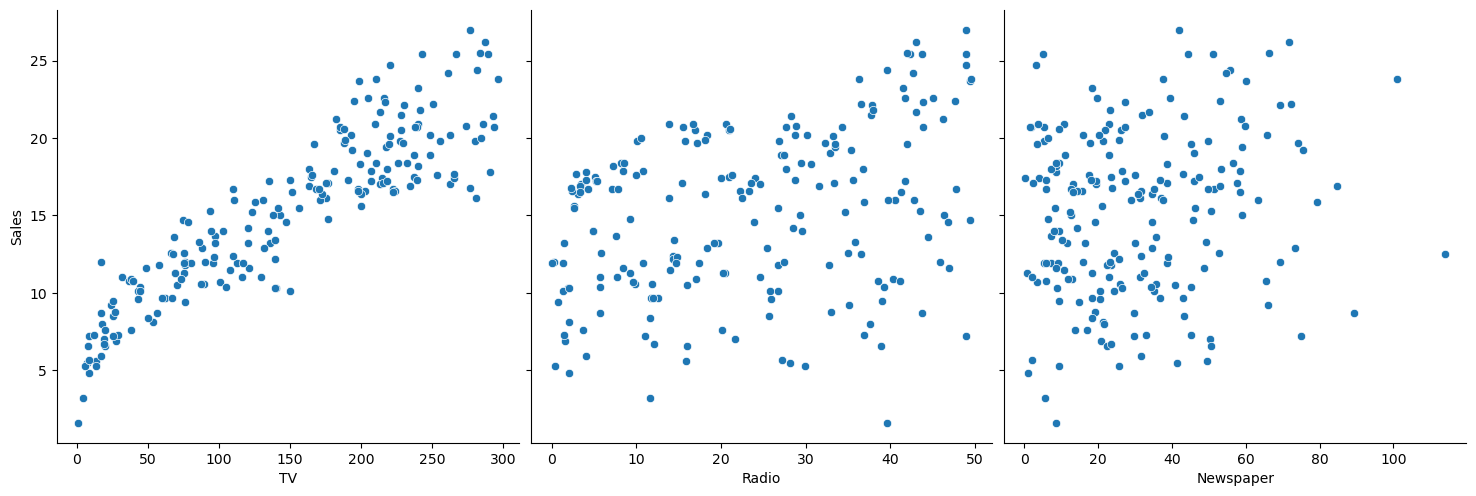

In [8]:
sns.pairplot(train_df,x_vars =['TV','Radio','Newspaper'],y_vars ='Sales',size = 5, kind='scatter')
plt.show()

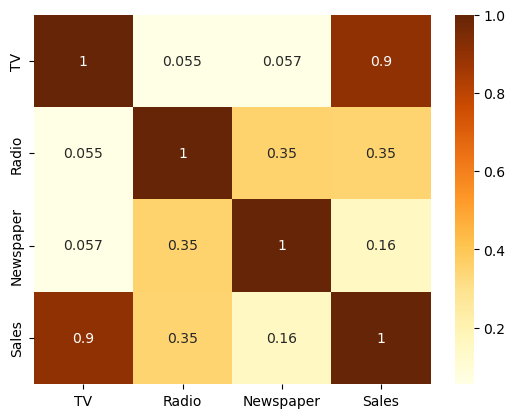

In [11]:
sns.heatmap(train_df.corr(),cmap = 'YlOrBr', annot = True)
plt.show()

In [12]:
X = train_df['TV']
y = train_df['Sales']

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8, test_size = 0.2, random_state = 100 )

In [15]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(160,)
(40,)
(160,)
(40,)


In [25]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [26]:
lr.params

const    6.995533
TV       0.054105
dtype: float64

In [27]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     727.7
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           5.03e-61
Time:                        00:20:59   Log-Likelihood:                -359.57
No. Observations:                 160   AIC:                             723.1
Df Residuals:                     158   BIC:                             729.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9955      0.343     20.386      0.0

In [28]:
X_test_sm = sm.add_constant(X_test)

In [30]:
y_pred = lr.predict(X_test_sm)
y_pred.head()

126     7.417556
104    19.883459
99     14.310594
92     18.774296
111    20.072828
dtype: float64

In [32]:
print( "RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred ) ))

RMSE:  2.3126831803046124


In [33]:
print( "R-squared: ",r2_score( y_test, y_pred ) )

R-squared:  0.728135274407888


In [35]:
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [39]:
y_train_lm = y_train.values.reshape(-1,1)

In [36]:
print(X_train_lm.shape)
print(X_train_lm.shape)

(160, 1)
(160, 1)


In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit( X_train_lm , y_train_lm )

LinearRegression()

In [41]:
print( lr.intercept_ )
print( lr.coef_ )

[6.99553291]
[[0.05410548]]
